# Investment Assigment

In [46]:
#Definations
companiesPath = "data/companies.txt"
round2Path = "data/rounds2.csv"
mappingPath = "data/mapping.csv"

#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Reading Companies & round2 file
companies = pd.read_csv(companiesPath, sep="\t",encoding='iso-8859-1')
rounds2 = pd.read_csv(round2Path, sep=",",encoding='iso-8859-1')
mapping = pd.read_csv(mappingPath, sep=",",encoding='iso-8859-1')

## Checkpoint 1: Data Cleaning 1

### Cleaning rounds2 table

In [2]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [3]:
# Printing number of null object per column
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### Cleaning round2 Table : 
1. Here 'funding_round_code' is not required for analysis so dropping that column.
2. Also, rows not having 'raised_amount_usd' data are useless so dropping the rows having 'raised_amount_usd' as null.
3. In the 'company_permalink' column the entries were similar but treated differently because of text case. So the whole column was converted to lower case.

In [4]:
#Creating a copy of rounds2 table
clean_rounds2 = rounds2.copy()

#Dropping 'funding_round_code' column
clean_rounds2 = rounds2.drop(['funding_round_code','funding_round_permalink','funded_at'], axis = 1)

#Removing rows having 'raised_amount_usd' as null
clean_rounds2 = clean_rounds2.dropna(subset=['raised_amount_usd'])

#Converting company_permalink column to lower case
clean_rounds2['company_permalink'] = clean_rounds2['company_permalink'].str.lower() 

# Printing number of null object per column
clean_rounds2.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [5]:
clean_rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 3 columns):
company_permalink     94959 non-null object
funding_round_type    94959 non-null object
raised_amount_usd     94959 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.9+ MB


### Cleaning companies table

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
# Printing number of null object per column
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

### Cleaning companies Table : 
1. Here 'state_code','region','founded_at','homepage_url','homepage_url' &'city' are not required for analysis so dropping that columns.
2. Also, rows not having 'country_code' data are useless so dropping the rows having 'country_code' as null.
3. In the 'permalink' column the entries were similar but treated differently because of text case. So the whole column was converted to lower case.

In [8]:
#Creating a copy of companies table
clean_companies = companies.copy()

#Dropping unnecessary column
clean_companies = companies.drop(['state_code','region','founded_at','homepage_url','homepage_url','city'], axis = 1)

#Removing rows having 'country_code' or 'name' as null
clean_companies = clean_companies.dropna(subset=['country_code'])

#Converting permalink column to lower case
clean_companies['permalink'] = companies['permalink'].str.lower() 

#Creating a copy of companies table
clean_companies.isnull().sum()

permalink           0
name                1
category_list    1606
status              0
country_code        0
dtype: int64

In [9]:
clean_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59410 entries, 0 to 66366
Data columns (total 5 columns):
permalink        59410 non-null object
name             59409 non-null object
category_list    57804 non-null object
status           59410 non-null object
country_code     59410 non-null object
dtypes: object(5)
memory usage: 2.7+ MB


### Q1: How many unique companies are present in rounds2?

In [10]:
#Finding the uniques values of the companies from round2
clean_rounds2["company_permalink"].nunique()

53915

### Ans: 53915

### Q2: How many unique companies are present in the companies file?

In [11]:
clean_companies['permalink'] = companies['permalink'].str.lower() 
clean_companies["permalink"].nunique()

59410

### Ans: 59410

### Q3: In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
### Ans: "permalink"
Because permalink is a type of persistent identifier and the word permalink is sometimes used as a synonym of persistent identifier. 

### Q4: Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [12]:
#Count all the unique companies from 'companies' table and also include common companies between 'round2' & 'companies' table
companies_frame = pd.merge(clean_rounds2, clean_companies, how='right', left_on='company_permalink', right_on='permalink')
companies_companies = companies_frame["company_permalink"].nunique()

#Count all the unique companies from both 'companies' & 'round2' tables
all_frame = pd.merge(clean_rounds2, clean_companies, how='outer', left_on='company_permalink', right_on='permalink')
all_companies = all_frame["company_permalink"].nunique()

#Printing the count of uniques companies from 'round2' table which are not present in 'companies' tables
print(all_companies- companies_companies)

4648


### Ans: N
Because 4648 companies are present in 'round2' table which are not present in 'companies' tables.

### Q5: Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [13]:
master_frame = pd.merge(clean_rounds2, clean_companies, how='left', left_on='company_permalink', right_on='permalink')
master_frame = master_frame.drop(['permalink'], axis = 1)
len(master_frame.index)

94959

### Ans: 94959 observation are present in master_frame.

## Checkpoint 2: Funding Type Analysis

### Q1: Average funding amount of venture type?

In [14]:
#Creating a copy of master frame
copy_frame = master_frame.copy()

# making boolean series for a team name 
filter = copy_frame["funding_round_type"]== "venture"
  
# filtering data 
copy_frame.where(filter, inplace =True) 

#Creating group by object
obj = copy_frame.groupby(['funding_round_type'])

#Applying grouping & taking average
ventureAvg = obj['raised_amount_usd'].mean()
ventureAvg

funding_round_type
venture    1.174895e+07
Name: raised_amount_usd, dtype: float64

### Ans: 11.74 Million USD

### Q2: Average funding amount of angel type?

In [15]:
#Creating a copy of master frame
copy_frame = master_frame.copy()

# making boolean series for a team name 
filter = copy_frame["funding_round_type"]== "angel"
  
# filtering data 
copy_frame.where(filter, inplace =True) 

#Creating group by object
obj = copy_frame.groupby(['funding_round_type'])

#Applying grouping & taking average
ventureAvg = obj['raised_amount_usd'].mean()
ventureAvg

funding_round_type
angel    958694.469753
Name: raised_amount_usd, dtype: float64

### Ans: 0.95 Million USD

### Q3: Average funding amount of seed type?

In [16]:
#Creating a copy of master frame
copy_frame = master_frame.copy()

# making boolean series for a team name 
filter = copy_frame["funding_round_type"]== "seed"
  
# filtering data 
copy_frame.where(filter, inplace =True) 

#Creating group by object
obj = copy_frame.groupby(['funding_round_type'])

#Applying grouping & taking average
ventureAvg = obj['raised_amount_usd'].mean()
ventureAvg

funding_round_type
seed    719817.996907
Name: raised_amount_usd, dtype: float64

### Ans: 0.71 Million USD

### Q4: Average funding amount of private_equity type?

In [17]:
#Creating a copy of master frame
copy_frame = master_frame.copy()

# making boolean series for a team name 
filter = copy_frame["funding_round_type"]== "private_equity"
  
# filtering data 
copy_frame.where(filter, inplace =True) 

#Creating group by object
obj = copy_frame.groupby(['funding_round_type'])

#Applying grouping & taking average
ventureAvg = obj['raised_amount_usd'].mean()
ventureAvg

funding_round_type
private_equity    7.330859e+07
Name: raised_amount_usd, dtype: float64

### Ans: 73.33 Million USD

### Q5: Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

### Ans: venture

## Checkpoint 3: Country Analysis

### The top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [18]:
#Creating a copy of master frame
copy_frame = master_frame.copy()

#Delete the rows other than 'private_equity' funding_round_type
copy_frame = copy_frame[copy_frame.funding_round_type == 'venture']

#Creating group by object
obj = copy_frame.groupby(['country_code'])

#Applying grouping & taking top 9 countries based on raised_amount_usd
countriesCount = obj['raised_amount_usd'].sum().sort_values(ascending = False)
top9 = countriesCount.head(9)

#Printing top9
top9

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

### Q1: Top English speaking country?

### Ans: USA i.e. United States.

### Q2: Second English speaking country?

### Ans: GBR i.e. United Kingdom.

### Q3: Third English speaking country?

### Ans: IND i.e. India.

## Checkpoint 4: Sector Analysis 1

In [19]:
#printing top 5 values of category_list column objects
master_frame['category_list'].head(5)

0                                                Media
1    Application Platforms|Real Time|Social Network...
2                                                  NaN
3                                          Curated Web
4                                                Games
Name: category_list, dtype: object

In [20]:
#Creating a copy of master frame
master_frameV2 = master_frame.copy()

#Adding column 'primary_sector' column
address = master_frameV2['category_list'].str.split("|", n = 1, expand = True) 
master_frameV2['primary_sector'] = address[0]

#printing top 5 values of extracted primary_sector objects
master_frameV2['primary_sector'].head(5)

0                    Media
1    Application Platforms
2                      NaN
3              Curated Web
4                    Games
Name: primary_sector, dtype: object

In [21]:
#Correct the spellings in the mapping file
correct_mapping = mapping.copy()
correct_mapping.category_list.replace(to_replace='0',value='na', inplace=True, regex=True)

In [22]:
#Creating a copy of mapping table
mapped = correct_mapping.copy()

#Converting the table from wide to long format
mapped = pd.melt(mapped, id_vars =['category_list'],
                       value_vars =['Manufacturing','Automotive & Sports',
                                    'Cleantech / Semiconductors','Entertainment',
                                    'Health','News, Search and Messaging','Others',
                                    'Social, Finance, Analytics, Advertising'])
mapped = mapped[~(mapped.value == 0)]
mapped = mapped.drop('value', axis = 1)
mapped = mapped.rename(columns = {"variable":"main_sector"})

#Printing first 5 rows of new mapped mapping table
mapped.head(5)

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [23]:
master_frameV2.head(5)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,Media
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Application Platforms
2,/organization/-the-one-of-them-inc-,venture,3406878.0,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,Curated Web
4,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,operating,HKG,Games


In [24]:
#Lower case the values in the unique columns before merging
mapped['category_list'] = mapped['category_list'].str.lower() 
master_frameV2['primary_sector'] = master_frameV2['primary_sector'].str.lower() 

#Merging the mapped and master frame
master_frameV3 = pd.merge(master_frameV2, mapped, how='left', left_on='primary_sector', right_on='category_list')
master_frameV3 = master_frameV3.drop(['category_list_y','category_list_x'], axis = 1)
master_frameV3.head(5)

,company_permalink,funding_round_type,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,operating,IND,media,Entertainment
1,/organization/-qounter,seed,700000.0,:Qounter,operating,USA,application platforms,"News, Search and Messaging"
2,/organization/-the-one-of-them-inc-,venture,3406878.0,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,venture,2000000.0,0-6.com,operating,CHN,curated web,"News, Search and Messaging"
4,/organization/01games-technology,undisclosed,41250.0,01Games Technology,operating,HKG,games,Entertainment


## Checkpoint 5: Sector Analysis 2

In [25]:
#Filter of 5-15million, venture, and USA
D1 = master_frameV3.copy()

D1 = D1[D1['country_code'] == 'USA']

D1 = D1[(D1['raised_amount_usd'] >= 5000000.0)]
D1 = D1[D1['raised_amount_usd'] <= 15000000.0]

D1 = D1[D1['funding_round_type'] == 'venture']

D1.head(5)

,company_permalink,funding_round_type,raised_amount_usd,name,status,country_code,primary_sector,main_sector
10,/organization/0xdata,venture,8900000.0,H2O.ai,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
16,/organization/1-mainstream,venture,5000000.0,1 Mainstream,acquired,USA,apps,"News, Search and Messaging"
78,/organization/128-technology,venture,11999347.0,128 Technology,operating,USA,service providers,Others
84,/organization/1366-technologies,venture,15000000.0,1366 Technologies,operating,USA,manufacturing,Manufacturing
85,/organization/1366-technologies,venture,5000000.0,1366 Technologies,operating,USA,manufacturing,Manufacturing


In [26]:
#Filter of 5-15million, venture, and GBR
D2 = master_frameV3.copy()

D2 = D2[D2['country_code'] == 'GBR']

D2 = D2[(D2['raised_amount_usd'] >= 5000000.0)]
D2 = D2[D2['raised_amount_usd'] <= 15000000.0]

D2 = D2[D2['funding_round_type'] == 'venture']

D2.head(5)

,company_permalink,funding_round_type,raised_amount_usd,name,status,country_code,primary_sector,main_sector
309,/organization/365scores,venture,5500000.0,365Scores,operating,GBR,android,"Social, Finance, Analytics, Advertising"
671,/organization/7digital,venture,8468328.0,7digital,acquired,GBR,content creators,Entertainment
672,/organization/7digital,venture,10000000.0,7digital,acquired,GBR,content creators,Entertainment
730,/organization/90min,venture,15000000.0,90min,operating,GBR,media,Entertainment
731,/organization/90min,venture,5800000.0,90min,operating,GBR,media,Entertainment


In [27]:
#Filter of 5-15million, venture, and CAN
D3 = master_frameV3.copy()

D3 = D3[D3['country_code'] == 'IND']

D3 = D3[(D3['raised_amount_usd'] >= 5000000.0)]
D3 = D3[D3['raised_amount_usd'] <= 15000000.0]

D3 = D3[D3['funding_round_type'] == 'venture']

D3.head(5)

,company_permalink,funding_round_type,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,operating,IND,media,Entertainment
178,/organization/21diamonds-india,venture,6369507.0,21Diamonds,operating,IND,e-commerce,Others
810,/organization/a-little-world,venture,6410000.0,A LITTLE WORLD,operating,IND,finance,"Social, Finance, Analytics, Advertising"
2051,/organization/adlabs-imagica,venture,8180000.0,Adlabs Imagica,operating,IND,entertainment,Entertainment
2849,/organization/agile,venture,5740000.0,Agile,operating,IND,finance,"Social, Finance, Analytics, Advertising"


 ### Q1. Total number of investments (count)

In [28]:
print("D1 (USA): ", len(D1.index))
print("D2 (GBR): ", len(D2.index))
print("D3 (IND): ", len(D3.index))

D1 (USA):  12150
D2 (GBR):  628
D3 (IND):  330


### Ans: 
D1 (USA) :  12150

D2 (GBR) :  628

D3 (IND) :  330

### Q2. Total amount of investment (USD)

In [29]:
print("D1 (USA) investment: ", D1['raised_amount_usd'].sum())
print("D2 (GBR) investment: ", D2['raised_amount_usd'].sum())
print("D3 (IND) investment: ", D3['raised_amount_usd'].sum())

D1 (USA) investment:  108531347515.0
D2 (GBR) investment:  5436843539.0
D3 (IND) investment:  2976543602.0


### Ans:
D1 (USA) investment:  108.5 Billion

D2 (GBR) investment:  5.4 Billion

D3 (IND) investment:  2.9 Billion

### Q3 - Q8. Sector names and number of investments

In [30]:
#Creating group by object
obj = D1.groupby(['main_sector'])

#Applying grouping & taking average
copy_D1 = obj['raised_amount_usd'].count().sort_values(ascending = False)
copy_D1

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [31]:
#Creating group by object
obj = D2.groupby(['main_sector'])

#Applying grouping & taking average
copy_D2 = obj['raised_amount_usd'].count().sort_values(ascending = False)
copy_D2

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [32]:
#Creating group by object
obj = D3.groupby(['main_sector'])

#Applying grouping & taking average
copy_D3 = obj['raised_amount_usd'].count().sort_values(ascending = False)
copy_D3

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

### ANS: 
![title](image1.png)

### Q9. For point 3 (top sector count-wise), which company received the highest investment?

In [33]:
D = D1.copy()
filterSec = 'Others'

D = D[D['main_sector'] == filterSec]

obj = D.groupby(['company_permalink'])

group_D = obj['raised_amount_usd'].sum().sort_values(ascending = False)

company_D = D[D['company_permalink'] == group_D.index[0]]['name'].head(5)

print("D1 (USA): ", company_D[company_D.index[0]])

D1 (USA):  Virtustream


In [34]:
D = D2.copy()
filterSec = 'Others'

D = D[D['main_sector'] == filterSec]

obj = D.groupby(['company_permalink'])

group_D = obj['raised_amount_usd'].sum().sort_values(ascending = False)

company_D = D[D['company_permalink'] == group_D.index[0]]['name'].head(5)

print("D2 (GBR): ", company_D[company_D.index[0]])

D2 (GBR):  Electric Cloud


In [35]:
D = D3.copy()
filterSec = 'Others'

D = D[D['main_sector'] == filterSec]

obj = D.groupby(['company_permalink'])

group_D = obj['raised_amount_usd'].sum().sort_values(ascending = False)

company_D = D[D['company_permalink'] == group_D.index[0]]['name'].head(5)

print("D3 (CAN): ", company_D[company_D.index[0]])

D3 (CAN):  FirstCry.com


### Ans:
D1 (USA):  Virtustream

D2 (GBR):  Electric Cloud

D3 (CAN):  FirstCry.com

### Q10. For point 4 (second best sector count-wise), which company received the highest investment?

In [36]:
D = D1.copy()
filterSec = 'Cleantech / Semiconductors'

D = D[D['main_sector'] == filterSec]

obj = D.groupby(['company_permalink'])

group_D = obj['raised_amount_usd'].sum().sort_values(ascending = False)

company_D = D[D['company_permalink'] == group_D.index[0]]['name'].head(5)

print("D1 (USA): ", company_D[company_D.index[0]])

D1 (USA):  Biodesix


In [37]:
D = D2.copy()
filterSec = 'Cleantech / Semiconductors'

D = D[D['main_sector'] == filterSec]

obj = D.groupby(['company_permalink'])

group_D = obj['raised_amount_usd'].sum().sort_values(ascending = False)

company_D = D[D['company_permalink'] == group_D.index[0]]['name'].head(5)

print("D2 (GBR): ", company_D[company_D.index[0]])

D2 (GBR):  EUSA Pharma


In [38]:
D = D3.copy()
filterSec = 'News, Search and Messaging'

D = D[D['main_sector'] == filterSec]

obj = D.groupby(['company_permalink'])

group_D = obj['raised_amount_usd'].sum().sort_values(ascending = False)

company_D = D[D['company_permalink'] == group_D.index[0]]['name'].head(5)

print("D3 (CAN): ", company_D[company_D.index[0]])

D3 (CAN):  GupShup


### ANS: 
D1 (USA):  Biodesix

D2 (GBR):  EUSA Pharma

D3 (CAN):  GupShup

## Checkpoint 6: Plots

### Q1: A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

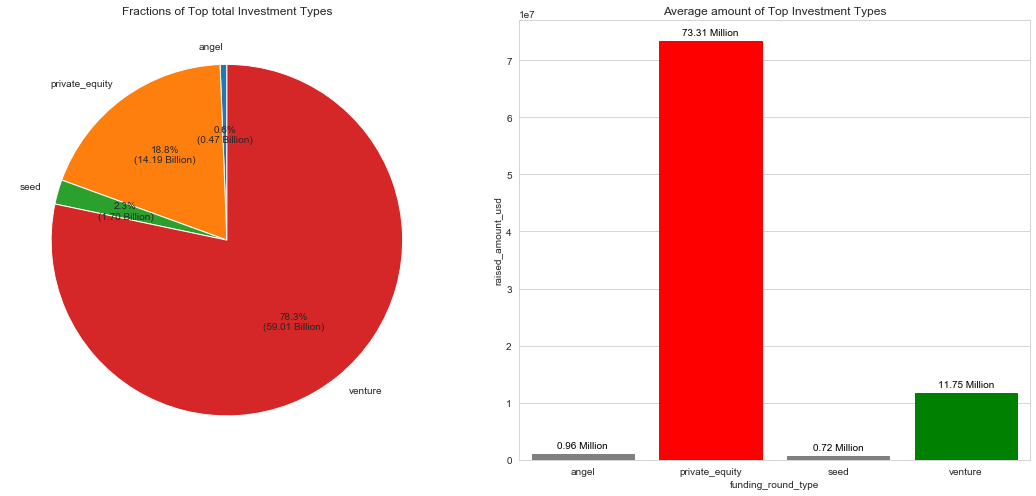

In [41]:
#Creating a copy of master frame
copy_frame = master_frameV3.copy()
copy_frame = copy_frame.loc[(copy_frame.funding_round_type == 'venture') | (copy_frame.funding_round_type == 'private_equity') |
                            (copy_frame.funding_round_type == 'angel') | (copy_frame.funding_round_type == 'seed'), :]

#Creating group by object
obj = copy_frame.groupby(['funding_round_type'])

#Applying grouping & taking average
ventureAvg = obj['raised_amount_usd'].sum()

#Function used by Pie chart
def func(pct, allvals):
    absolute = float((pct/100.*np.sum(allvals)/10000000000))
    return "{:.1f}%\n({:.2f} Billion)".format(pct, absolute)

#Function used by Bar Chart
def avgval (f):
    f = round(f / 1000000,2);
    o = str(f) + " Million"
    return o;

#Increase figure size 
plt.figure(figsize=(15, 7))

##############################################################################################################
#Subplots 1 Pie Chart
plt.subplot(1, 2, 1)
plt.title("Fractions of Top total Investment Types")

#Data used by the pie chart
labels = [ventureAvg.index[0], ventureAvg.index[1], ventureAvg.index[2], ventureAvg.index[3]]
sizes = [ventureAvg[0], ventureAvg[1], ventureAvg[2], ventureAvg[3]]

#Plotting the pie chart
plt.pie(sizes, labels=labels, autopct= lambda pct: func(pct, sizes),
        startangle=90)

##############################################################################################################
#Subplot 2 Bar plot
plt.subplot(1, 2, 2)
plt.title('Average amount of Top Investment Types')

#Objects used for plotting the pie chart
groupedvalues = copy_frame.groupby(['funding_round_type']).mean().reset_index()
rank = groupedvalues["raised_amount_usd"].argsort().argsort() 

#Plotting the bar plot
g = sns.barplot(x='funding_round_type',y='raised_amount_usd',data=groupedvalues, 
                color='red')

#Displaying investment average amount above the respective bars
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.raised_amount_usd+1000000 , avgval(row.raised_amount_usd), color='black', ha="center")

for bar in g.patches:
    if bar.get_height() > 15000000:
        bar.set_color('red')
    elif (bar.get_height() > 5000000) and (bar.get_height() < 15000000):
        bar.set_color('green')        
    elif bar.get_height() > 5000000:
        bar.set_color('grey')
    else:
        bar.set_color('grey')   
##############################################################################################################
#Showing both the plots
plt.tight_layout()
plt.savefig('C6_Q1.png', dpi=300)
plt.show()

### Q2: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

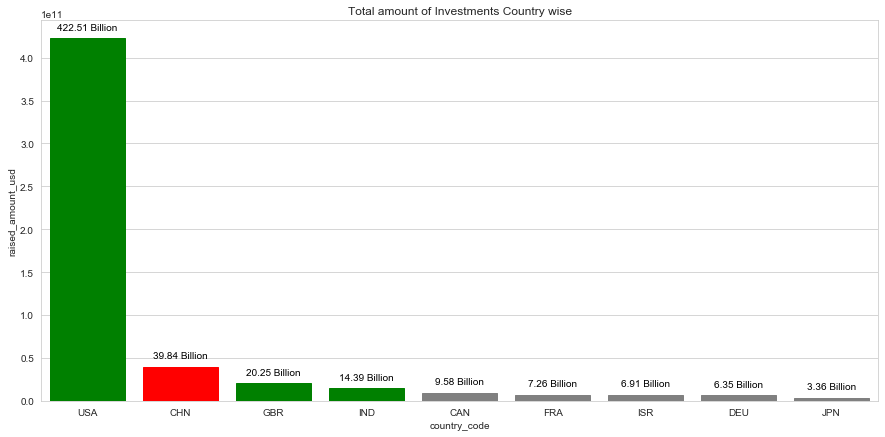

In [47]:
#Creating a copy of master frame
copy_frame = master_frame.copy()

#Delete the rows other than 'private_equity' funding_round_type
copy_frame = copy_frame[copy_frame.funding_round_type == 'venture']

#Creating group by object
obj = copy_frame.groupby(['country_code'])

#Applying grouping & taking top 9 countries based on raised_amount_usd
countriesCount = obj['raised_amount_usd'].sum().sort_values(ascending = False)
top9 = countriesCount.head(9)

#Printing top9
top9
#Function used by Bar Chart
def avgval (f):
    f = round(f / 1000000000,2);
    o = str(f) + " Billion"
    return o;
#Increase figure size 
plt.figure(figsize=(15, 7))
plt.title('Total amount of Investments Country wise')


#Plotting the bar plot
g = sns.barplot(x=top9.index,y=top9)

for bar in g.patches:
    g.text(bar.get_x()+0.4,bar.get_height()+10000000000, avgval(bar.get_height()), color='black', ha="center")
    
for bar in g.patches:
    if bar.get_height() > 40000000000:
        bar.set_color('green')
    elif (bar.get_height() < 40000000000) and (bar.get_height() > 39000000000):
        bar.set_color('red')        
    elif bar.get_height() > 14000000000 and (bar.get_height() < 39000000000):
        bar.set_color('green')
    else:
        bar.set_color('grey')
        
plt.savefig('C6_Q2.png', dpi=300)
plt.show()

### Q3: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

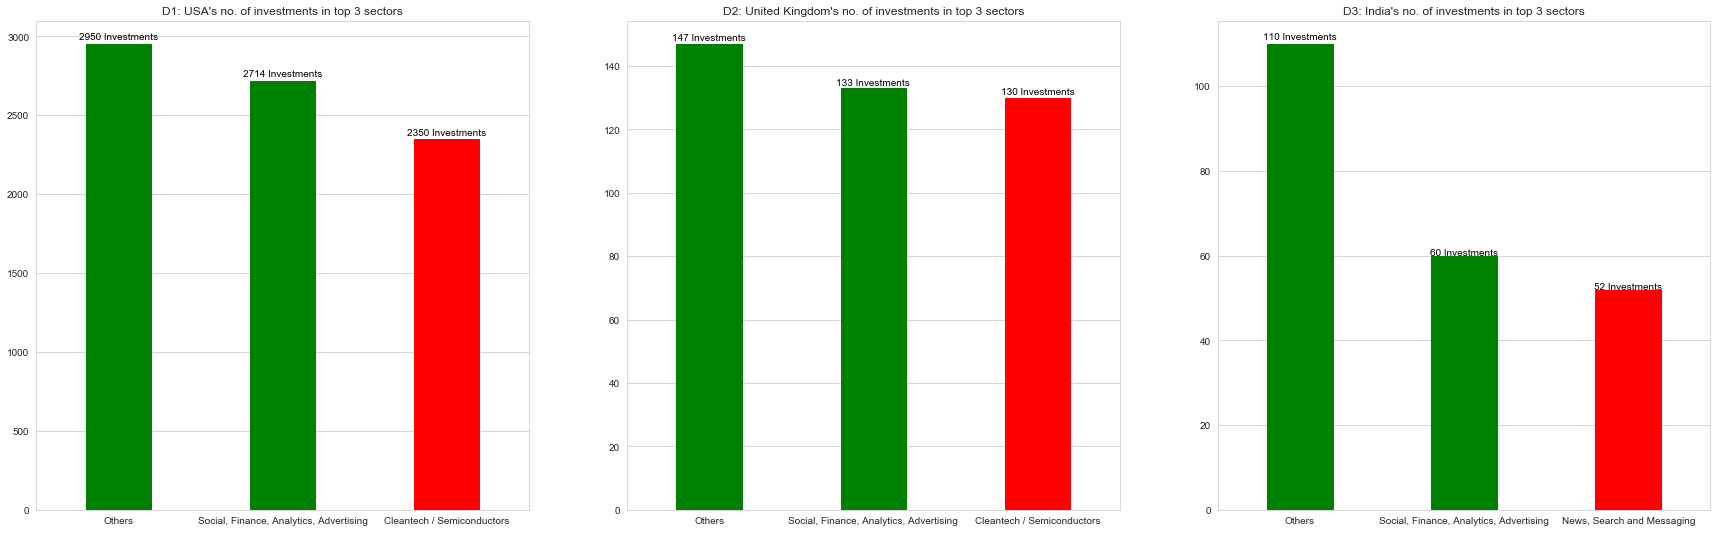

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: raised_amount_usd, dtype: int64

In [48]:
#Functions to change width of bar
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

#Function used by Bar Chart
def avgval (f):
    f = int(f)
    o = str(f) + " Investments"
    return o;

#Function used by Bar Chart
def venFun (ax):
    for bar in ax.patches:
        ax.text(bar.get_x()+0.2,bar.get_height()+int(bar.get_height()/90), avgval(bar.get_height()), color='black', ha="center")
        
#Function for the bar color
def barcolor (ax, h):
    for bar in ax.patches:
        if bar.get_height() > h:
            bar.set_color('green')
        else:
            bar.set_color('red')

#Increase figure size 
#plt.figure(figsize=(9, 20))
plt.figure(figsize=(30, 9))

##########################################################################################
#First plot
#Creating group by object
obj = D1.groupby(['main_sector'])
#Applying grouping & taking average
copy_D1 = obj['raised_amount_usd'].count().sort_values(ascending = False)
copy_D1 = copy_D1.head(3)
plt.subplot(1, 3, 1)
plt.title("D1: USA's no. of investments in top 3 sectors")
#Plotting the bar plot
g = sns.barplot(x=copy_D1.index,y=copy_D1 )
change_width(g, .4)
plt.ylim(0, 3100)
plt.ylabel("")
plt.xlabel("")
barcolor(g, 2700)
venFun(g)

##########################################################################################
#Second plot
#Creating group by object
obj = D2.groupby(['main_sector'])
#Applying grouping & taking average
copy_D2 = obj['raised_amount_usd'].count().sort_values(ascending = False)
copy_D2 = copy_D2.head(3)
plt.subplot(1, 3, 2)
plt.title("D2: United Kingdom's no. of investments in top 3 sectors")
#Plotting the bar plot
g = sns.barplot(x=copy_D2.index,y=copy_D2)
change_width(g, .4)
plt.ylabel("")
plt.xlabel("")
barcolor(g, 132)
venFun(g)

##########################################################################################
#Third plot
#Creating group by object
obj = D3.groupby(['main_sector'])
#Applying grouping & taking average
copy_D3 = obj['raised_amount_usd'].count().sort_values(ascending = False)
copy_D3 = copy_D3.head(3)
plt.subplot(1, 3, 3)
plt.title("D3: India's no. of investments in top 3 sectors")
#Plotting the bar plot
g = sns.barplot(x=copy_D3.index,y=copy_D3)
change_width(g, .4)
plt.ylabel("")
plt.xlabel("")
barcolor(g, 55)
venFun(g)

##########################################################################################
#Save and show 
plt.savefig('C6_Q3.png', dpi=300)
plt.show()
copy_D1